# Laboratorio 3 

## 1. Arquitectura de la CNN 

<p style="text-align: justify; line-height: 1.5;">
En el codigo se utiliza la arquitectura de GoogLeNet (o Inception V1) que es un modelo de Deep Learning diseñado para tareas de clasificacion de imagene, que cuenta con 22 capas en total. Se cuenta con un modelo de Machine Learning mas profundo que otros anteriores, lo que implica tener más capacidad de apredizaje y, como resultado, esto aumenta el rendimiento de del modelo.  
</p>

### Modelo de Deep Learning (aprendizaje profundo): 
<p style="text-align: justify; line-height: 1.5;">
GoogLeNet tiene 22 capas profundas, pero se encuentra optimizado para reducir su complejedad utilizando bloques Inception, los cuales cuentan con una combinacion de diferentes tamaños de filtros de convolución en paralelo, como se ve en la imagen:
</p>

<div style="text-align: center;">
    <img src="Imagenes_lab3\google-net-like.png" width="40%">
</div>

<p style="text-align: justify; line-height: 1.5;">
Donde se tiene:  
<br>
<b>Input:</b> Corresponde una imagen de tamaño 30x30, se sabe que cuenta con 3 canales de color debido a la profundidad.   <br>
<b>C1:</b> Corresponde a la primera capa de convolución que aplica un filtro 5x5, reduciendo el tamaño de la imagen a 28x28 con una profundidad de 10. Aquí se extraen las características básicas de cada imagen entrante, como lo son los bordes y las texturas.   <br>
<b>P1:</b> Capa de pooling (combinación), en esta capa se reduce el tamaño utilizando un filtro de 2x2, disminuyendo a 14x14. Esta capa ayuda a reducir el número de parámetros, pero manteniendo las características más importantes. <br>
<b>C2, C3, y C4:</b> Son capas de convolución adicionales que aplican filtros para continuar extrayendo las características más complejas en cada paso. Se puede ver cómo las dimensiones van disminuyendo de forma progresiva en cada capa, a diferencia de la profundidad, que va aumentando.   <br>
<b>P2:</b> Segunda capa de pooling, que se encarga de disminuir el tamaño a 7x7 con una profundidad de 18 antes de entrar al bloque Inception.   <br>
<b>Bloque Inception:</b>  Dentro de este bloque se aplican múltiples filtros de diferentes tamaños (1x1, 3x3, 5x5 y max pooling) en paralelo a la entrada. Así la red puede capturar características a diferentes escalas y niveles de detalle. Esto se puede ver de forma gráfica en la siguiente imagen.
</p> 

<div style="text-align: center;">
    <img src="Imagenes_lab3\Incepption-module.png" width="40%">
</div>

<p style="text-align: justify; line-height: 1.5;">
<b>P3: </b> Tercera capa de pooling, se encarga de reducir la dimensión espacial a 3x3, manteniendo la profundidad en 80.  <br>
<b>M1: </b> Capa de acoplamiento (o flatten), que convierte la salida de un vector unidimensional para la capa completamente conectada.  <br>
<b>FC (Fully Connected): </b> Capa completamente conectada que contiene 80 neuronas. Cada neura está conectada con todas las características obtenidas en los puntos anteriores.<br>
<b>Output: </b> La salida de la red es una capa de clasificación que determina la probabilidad de cada clase  <br>
</p> 

### Modificación del modelo
<p style="text-align: justify; line-height: 1.5;">
Es necesario adaptar el modelo al problema planteado en el laboratorio, es decir a las imagenes que se deben clasifican en los 21 tipos de uso de suelo (21 clases) obtenidas de la base de datos a utilizar. La adaptación se realiza de forma simple cambiando en el codigo inferior para que la red pueda clasificar en 21 clases en lugar de las 1000 clases originales de ImageNet.<br>
</p>

### Transfer Learning 
<p style="text-align: justify; line-height: 1.5;">
El transfer learning es una técnica utilizada en el entorno de la inteligencia artificial, donde se aprovecha los pesos preentrenados de un modelo en un conjunto de datos grandes, como ImageNet, y se ajustan para resolver un problema específico con un conjunto de datos mas pequeño o diferente.<br>
Esto tiene diversas ventajas, como lo son: aumento en la eficiencia del entrenamiento, menor necesidad de datos y unos mejores resultados en el entrenamiento. <br>
En este caso, se utiliza un transfer learning parcial, donde se reutilizan los pesos preentrenados en las capas convolucionales de GoogLeNet, y unicamente se ajustan las capas finales del modelo para adaptarlo al problema de las 21 clases explicado con anterioridad.
</p>

### Entrenamiento de los modelos
<p style="text-align: justify; line-height: 1.5;">
En este caso el modelo se entrena durante 10 épocas y en cada iteracion se guardan los parámetros ajustados. Generando 10 archivos .pth, uno por cada época, que contienen los pesos actualizados. Lo que permite realizar validaciones a modelos intermedios para determinar por ejemplo que modelo presentó el mejor desempeño, y para evitar perder el progreso si se llega a interrumpir el entrenamiento, lo que es muy util devido a lo tardado del proceso.<br>
Se aclara ademas que en este caso la función de perdida utilizada corresponde a CrossEntropyLoss, que es la adecuada para los problemas de clasificacion con varias clases. Y como optimizador se utilizó <b>Adam</b>, que tiene una tasa de aprendizaje de 0.001.
</p>

### Entrenamiento del modelos con la base de datos de "Uso de suelo":

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")               # Selección de la GPU
print("cuda" if torch.cuda.is_available() else "cpu")                               # Imprime el dispositivo seleccionado

# Load pretrained GoogLeNet model
model = models.googlenet(pretrained=True)                                           # Carga el modelo preentrenado GoogLeNet

# Modify the final fully connected layer for 100 classes
num_classes = 21                                                                    # Número de clases                      
model.fc = nn.Linear(model.fc.in_features, num_classes)                             # Modifica la capa final del modelo

# Move model to the chosen device
model = model.to(device)                                                            # Mueve el modelo a la GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()                                                   # Define la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)                          # Define el optimizador

# Data transformations (customize as needed)

    #Sin Data Augmentation
    
# transform = transforms.Compose([                                                    # Transformaciones de los datos
# transforms.Resize((224, 224)),                                                      # Redimensiona las imágenes
# transforms.ToTensor(),                                                              # Convierte las imágenes a tensores
# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),        # Normaliza los tensores
# ])

    #Con Data Augmentation
    
transform = transforms.Compose([                                                    # Transformaciones de los datos
transforms.Resize((224, 224)),                                                      # Redimensiona las imágenes
transforms.RandomHorizontalFlip(p=0.5),                                             # Voltea horizontalmente las imágenes con una probabilidad del 50%
transforms.RandomRotation(10),                                                      # Rota las imágenes aleatoriamente en un rango de 10 grados
transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),      # Ajusta el brillo, contraste, saturación y tono de las imágenes
transforms.ToTensor(),                                                              # Convierte las imágenes a tensores
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),        # Normaliza los tensores
])


# Load your dataset

# Assuming dataset is in a directory with subfolders for each class
train_dataset = datasets.ImageFolder(root="C:\\Users\\tiari\\OneDrive\\Documents\\IA\\images_train_test_val\\train", transform=transform)   # Carga el conjunto de datos de entrenamiento
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)                                                                       # Carga el conjunto de datos de entrenamiento en un DataLoader
 
# Training loop
num_epochs = 10                                                                     # Número de épocas
# Bucle de entrenamiento
for epoch in range(num_epochs):
    model.train()                                                                   # Pone el modelo en modo de entrenamiento
    running_loss = 0.0                                                              # Inicializa 
    for images, labels in train_loader:                                             # Bucle de entrenamiento
        images, labels = images.to(device), labels.to(device)                       # Mueve las imágenes y las etiquetas a la GPU

        # Forward pass
        outputs = model(images)                                                     # Pasa las imágenes por el modelo
        loss = criterion(outputs, labels)                                           # Calcula la pérdida

        # Backward pass and optimization
        optimizer.zero_grad()                                                       # Reinicia los gradientes
        loss.backward()                                                             # Retropropagación
        optimizer.step()                                                            # Actualiza los pesos
        running_loss += loss.item()                                                 # Acumula la pérdida
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")                        # Imprime la pérdida
    torch.save(model.state_dict(), f"C:\\Users\\tiari\\OneDrive\\Documents\\IA\\model_con_da_epoch_{epoch}.pth")       # Guarda el modelo
print("Training complete.")

cuda
Epoch [1/10], Loss: 0.7241
Epoch [2/10], Loss: 0.3621
Epoch [3/10], Loss: 0.2880
Epoch [4/10], Loss: 0.2232
Epoch [5/10], Loss: 0.1869
Epoch [6/10], Loss: 0.1404
Epoch [7/10], Loss: 0.1521
Epoch [8/10], Loss: 0.1216
Epoch [9/10], Loss: 0.1268
Epoch [10/10], Loss: 0.1357
Training complete.


## 2. Entrenamiento del modelo.

### a. Sin Data Augmentation.
<p style="text-align: justify; line-height: 1.5;">
Se comienza entrenando el modelo sin utilizar técnicas de data augmentation, por lo tanto los conjuntos de entrenamiento solo realizan las transformaciones basicas necesarias para ajustar las imagenes del conjunto de entrenamiento a lo requerido por GoogLeNet y normalizar los valores de los pixeles basados en las estadisticas del conjunto de datos ImageNet.<br>
Obteniendo la siguiente salida al terminar el entrenamiento:
</p>

Epoch [1/10], Loss: 0.6338  
Epoch [2/10], Loss: 0.2943  
Epoch [3/10], Loss: 0.2114  
Epoch [4/10], Loss: 0.1731  
Epoch [5/10], Loss: 0.1447  
Epoch [6/10], Loss: 0.1069  
Epoch [7/10], Loss: 0.1048  
Epoch [8/10], Loss: 0.1352  
Epoch [9/10], Loss: 0.0948  
Epoch [10/10], Loss: 0.0598  

<p style="text-align: justify; line-height: 1.5;">
Donde se puede ver a partir de la disminucion de la pérdida en cada época que el modelo logra aprender representaciones utiles de cada clase de la base de datos, sin la necesidad de utilizar data augmentation.
</p>

### b. Con Data Augmentation
<p style="text-align: justify; line-height: 1.5;">
Para agregar tecnicas de Data Augmentation y así aumentar la robustez del modelo, se realizan diversas transformaciones (Invertir, rotar, variar brillo, color y tono), generando variaciones de las imágenes originales. Esto ayude a evitar sobreajustes y mejora la capacidad de generalización del modelo.
Obteniendo en la salida:
</p>

Epoch [1/10], Loss: 0.7241  
Epoch [2/10], Loss: 0.3621  
Epoch [3/10], Loss: 0.2880  
Epoch [4/10], Loss: 0.2232  
Epoch [5/10], Loss: 0.1869  
Epoch [6/10], Loss: 0.1404  
Epoch [7/10], Loss: 0.1521  
Epoch [8/10], Loss: 0.1216  
Epoch [9/10], Loss: 0.1268  
Epoch [10/10], Loss: 0.1357  

### Comparacion de ambas técnicas.

<table style="width:20%">
<tr>
<th><Nombre></th>
<th><Dirección></th>
<th><Salario></th>
</tr>

<tr>
<td><Hanna></td>
<td><Brisbane></td>
<td><4000></td>
</tr>

<tr>
<td><Adam></td>
<td><Sydney></td>
<td><5000></td>
</tr>
</table>


# Validación

Dispositivo: cuda


c:\Users\tiari\miniconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tiari\miniconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\tiari\AppData\Local\Temp\ipykernel_28660\2816725661.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytor

Precisión en el conjunto de validación: 96.57%


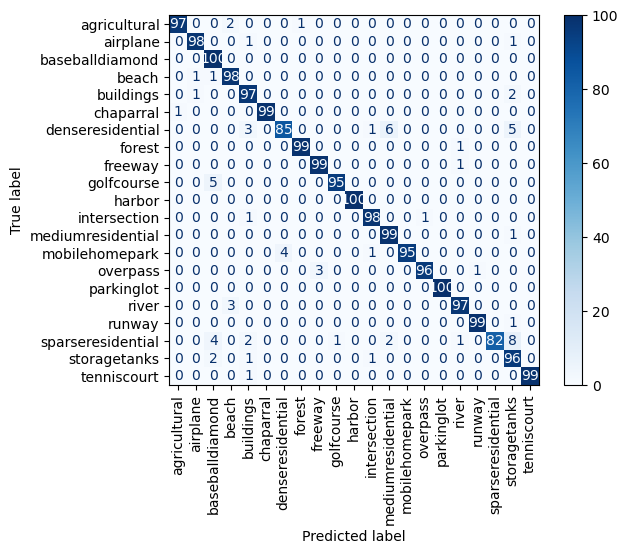

In [1]:

import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Configurar el dispositivo (usar GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")           # Selección de la GPU      
print("Dispositivo:", "cuda" if torch.cuda.is_available() else "cpu")           # Imprime el dispositivo seleccionado

# Cargar el modelo GoogLeNet preentrenado
model = models.googlenet(pretrained=True)                                       # Carga el modelo preentrenado GoogLeNet

# Modificar la capa totalmente conectada final para 21 clases
num_classes = 21                                                                # Número de clases
model.fc = nn.Linear(model.fc.in_features, num_classes)                         # Modifica la capa final del modelo

# Mover el modelo al dispositivo seleccionado
model = model.to(device)                                                        # Mueve el modelo a la GPU

# Cargar el estado del modelo desde un archivo .pth
model_path = "C:\\Users\\tiari\\OneDrive\\Documents\\IA\\model_epoch_9.pth"     # Ruta del archivo .pth
model.load_state_dict(torch.load(model_path))                                   # Carga el estado del modelo
model.eval()                                                                    # Poner el modelo en modo de evaluación

# Definir las transformaciones de los datos (ajustar según sea necesario)
transform = transforms.Compose([                                                # Transformaciones de los datos
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Cargar el conjunto de validación
val_dataset = datasets.ImageFolder(root="C:\\Users\\tiari\\OneDrive\\Documents\\IA\\images_train_test_val\\validation", transform=transform)    # Carga el conjunto de validación
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)                                                                              # Carga el conjunto de validación en un DataLoader

# Función para evaluar el modelo
def evaluate_model(model, val_loader):                                          # Función para evaluar el modelo
    correct = 0                                                                 # Inicializa el número de predicciones correctas
    total = 0                                                                   # Inicializa el número total de predicciones
    all_labels = []                                                             # Inicializa las etiquetas verdaderas
    all_preds = []                                                              # Inicializa las etiquetas y las predicciones

    with torch.no_grad():                                                       # Deshabilita el cálculo de gradientes
        # Bucle de evaluación
        for images, labels in val_loader:                                    
            images, labels = images.to(device), labels.to(device)               # Mueve las imágenes y las etiquetas a la GPU
            outputs = model(images)                                             # Pasa las imágenes por el modelo
            _, predicted = torch.max(outputs, 1)                                # Obtiene las predicciones
            total += labels.size(0)                                             # Actualiza el número total de predicciones
            correct += (predicted == labels).sum().item()                       # Actualiza el número de predicciones correctas
            all_labels.extend(labels.cpu().numpy())                             # Añade las etiquetas verdaderas
            all_preds.extend(predicted.cpu().numpy())                           # Añade las predicciones

    accuracy = correct / total                                                  # Calcula la precisión
    print(f'Precisión en el conjunto de validación: {accuracy * 100:.2f}%')     # Imprime la precisión

    # Matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)                                            # Calcula la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_dataset.classes)  # Configura la visualización
    
    # Configurar las etiquetas en vertical
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)                             # Visualiza la matriz de confusión
    plt.show()                                                                   # Muestra la visualización
    
# Evaluar el modelo
evaluate_model(model, val_loader)                                                # Evalúa el modelo


# Matriz de confusión  

Precisión en el conjunto de validación: 96.57%  

<div style="text-align: center;">
    <img src="Imagenes_lab3\output_sinDA.png" width="30%">
</div>